# Monte Carlo Simulations 

One of the more interesting use cases of probability distributions is using them to create simulations. With **monte carlo simulations**, we can model real-world phenomena we are interested in with random events following probability distributions. We can see how different variables interact with one another and see what outcomes converge. 

After learning how to extract random values from a normal distribution, we will model a simulation of the Monty Hall problem as well as a customer wait queue. Finally, an exercise will solidify understanding using an elevator weight simulation. 

## Generating Random Values 

With just your knowledge of probability distributions, you can actually generate random values from them using a PPF and a randomly generated value between 0 and 1.

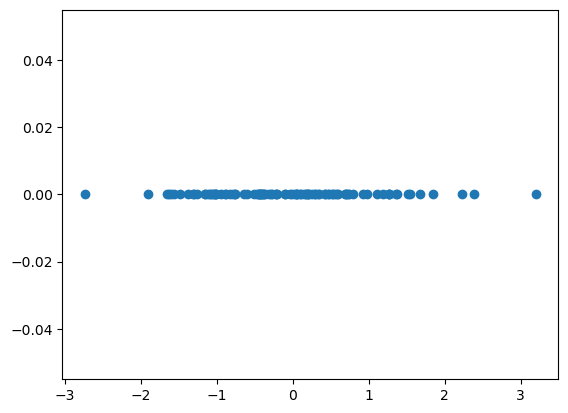

In [5]:
from scipy.stats import norm
import random
import matplotlib.pyplot as plt

mean, std = 0, 1

X = []
for i in range(100):
    # random value between 0 and 1
    random_p = random.random()

    # look up that that random probability in PPF
    random_x = norm.ppf(random_p, mean, std)
    
    X.append(random_x)

plt.plot(X, [0 for _ in X], 'o') # use a scatterplot to make numberline 

The easiest way to generate random values from any distribution is to use NumPy instead of SciPy, using the distributions in the random package. Below we randomly generate 10 values from the normal distribution, where `loc` is the mean and `scale` is the standard deviation. We will get a vector of values that follow that normal distribution. 

[ 0.62071431 -0.62621361  1.69158471  0.39812538 -0.7334794   0.24429883
  1.22153127 -1.23237409 -1.95546643  0.05258984  0.01211882 -0.02238953
 -1.39193361  2.22610628  0.72771343 -0.2120722   0.69757781  1.93379573
  1.3193294  -0.35115455  0.72728832 -1.60089842  0.18211698  0.54691138
  0.13282633 -1.42832364 -0.94250036 -0.7647781   0.23259982 -0.45488382
  0.55824401  0.7329087   1.03626656 -0.56081721  0.06959274 -0.19641337
  0.04126545 -1.32946458  0.67704275 -0.24374643 -1.751888    0.32409229
 -0.48907102  1.34987978  0.41013617  0.01660958  1.26773267  0.48684668
  0.40563731  0.62513973 -0.1777253   1.74258178 -0.53477919  0.81158352
 -0.43705652  0.32684047 -0.7744289  -1.26708591  1.16972004  2.04679232
 -0.5856793   0.15594711 -0.52972351 -0.696432   -1.3706578  -0.41997041
  0.0489553  -0.33277261  0.76504651  0.06910605  0.34899548 -0.10928342
  2.16359196 -0.54306078  1.40390178 -1.847715    0.36252961  0.24505535
 -1.45555695  0.26909211 -0.72044168  0.41953551  0

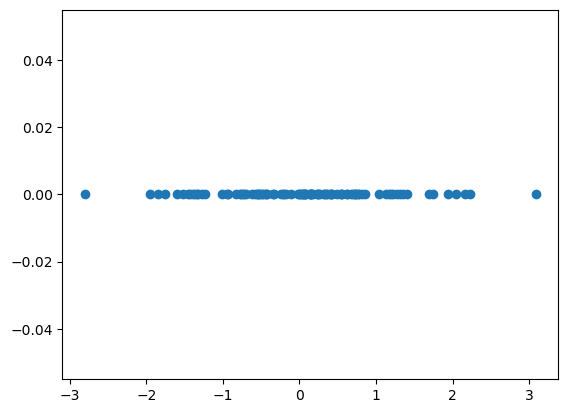

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

X = np.random.normal(loc=0, scale=1, size=100)

print(X)
plt.plot(X, [0 for _ in X], 'o') # use a scatterplot to make numberline 
plt.show()

In [8]:
from random import randint, choice

def random_door(): return randint(1, 3)

trial_count = 10000

stay_wins = 0
switch_wins = 0

for i in range(0, trial_count):
    prize_door = random_door()
    selected_door = random_door()
    opened_door = choice([d for d in range(1, 4) if d != selected_door and d != prize_door])
    switch_door = choice([d for d in range(1, 4) if d != selected_door and d != opened_door])

    if selected_door == prize_door:
        stay_wins += 1

    if switch_door == prize_door:
        switch_wins += 1

print("STAY WINS: {}, SWITCH WINS: {}".format(
    stay_wins, switch_wins))

print("STAY WIN RATE: {}, SWITCH WIN RATE: {}".format(
    float(stay_wins)/float(trial_count), float(switch_wins)/float(trial_count)))

STAY WINS: 3250, SWITCH WINS: 6750
STAY WIN RATE: 0.325, SWITCH WIN RATE: 0.675


## Customer Queue Simulation

In [10]:
import numpy as np
from numpy.random import normal, exponential

np.random.seed(0)

mean_checkout_time = 3  # minutes
std_checkout_time = .5  # minutes
mean_arrival_rate = 20 / 60  # customers per minute
customer_ct = 100

# customer arrival times relative to the previous customer
customer_time_betweens = exponential(scale=1/mean_arrival_rate, size=customer_ct+2) # need to add 2 to prevent out-of-index errors

# customer arrival times as minutes since start of simulation
customer_arrival_times = np.cumsum(customer_time_betweens)

# customer checkout times
customer_checkout_times = normal(loc=mean_checkout_time, scale=std_checkout_time, size=customer_ct+2) # need to add 2 to prevent out-of-index errors

# start time at 0 but jump to first customer arrival, and track whether customer is being processed
# and which customers are waiting
current_time = customer_arrival_times[0]
waiting_customers = []

arrived_customer_i = 0
processing_customer_i = 0
processing_customer_start_time = customer_arrival_times[0]

# process customers but stop when max is hit
while processing_customer_i < customer_ct and arrived_customer_i < customer_ct:

    # arrival time of processing customer
    processing_cust_arr_tm = customer_arrival_times[processing_customer_i]

    # scheduled finish time of processing customer
    processing_cust_fin_tm = processing_customer_start_time + \
                             customer_checkout_times[processing_customer_i]

    # time of next customer arrival
    def next_cust_arr_tm(): return customer_arrival_times[arrived_customer_i+1]

    # CHECK WHICH EVENT OCCURRED BY MATCHING THE TIMES
    next_event_time = None

    # if the first customer
    if current_time == processing_customer_start_time:
        print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, NO LINE, PROCESSING IMMEDIATELY")
        next_event_time = np.min([processing_cust_fin_tm, next_cust_arr_tm()])

    # if a customer arrives
    elif current_time == next_cust_arr_tm():
        arrived_customer_i +=1 # increment the arrived customer index

        # if there is no queue and the arriving customer is next
        if processing_customer_i == arrived_customer_i:
            processing_customer_start_time = current_time
            processing_cust_fin_tm = processing_customer_start_time + customer_checkout_times[processing_customer_i]

            print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, NO LINE, PROCESSING IMMEDIATELY")
        # else there is a queue and the customer must wait in line
        else:
            waiting_customers.append(arrived_customer_i)
            print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, ADDING TO LINE {waiting_customers}")

        # schedule next event time to be the processing customer finishing or the next customer arrival
        next_event_time = np.min([processing_cust_fin_tm, next_cust_arr_tm()])

    # if a customer finishes processing
    elif current_time == processing_cust_fin_tm:

        # if queue is not empty, take customer out of queue
        if waiting_customers:
            waiting_customers.pop(0)
            print(f"{current_time}: CUSTOMER {processing_customer_i} FINISHED, CUSTOMER {processing_customer_i + 1}"
                  f" REMOVED FROM LINE {waiting_customers}")

            processing_customer_start_time = current_time

            # next event is this customer finishing or the next customer arrival
            next_event_time = np.min([processing_customer_start_time + customer_checkout_times[processing_customer_i +1],
                                      next_cust_arr_tm()])

        else:
            # if the queue is empty, wait for next customer 
            print(f"{current_time}: CUSTOMER {processing_customer_i} FINISHED, WAITING FOR CUSTOMER {processing_customer_i+1}")
            next_event_time = next_cust_arr_tm()

        processing_customer_i += 1 # process next customer

    # move forward to next event
    current_time = next_event_time

2.38762352448933: CUSTOMER 0 ARRIVED, NO LINE, PROCESSING IMMEDIATELY
5.62045474435456: CUSTOMER 0 FINISHED, WAITING FOR CUSTOMER 1
6.155415813386844: CUSTOMER 1 ARRIVED, NO LINE, PROCESSING IMMEDIATELY
8.387293970248232: CUSTOMER 1 FINISHED, WAITING FOR CUSTOMER 2
8.92508525079905: CUSTOMER 2 ARRIVED, NO LINE, PROCESSING IMMEDIATELY
11.286688707750862: CUSTOMER 3 ARRIVED, ADDING TO LINE [3]
12.66921134769685: CUSTOMER 2 FINISHED, CUSTOMER 3 REMOVED FROM LINE []
12.93983418103736: CUSTOMER 4 ARRIVED, ADDING TO LINE [4]
16.05431206586819: CUSTOMER 5 ARRIVED, ADDING TO LINE [4, 5]
16.61715593571214: CUSTOMER 3 FINISHED, CUSTOMER 4 REMOVED FROM LINE [5]
17.78086966337411: CUSTOMER 6 ARRIVED, ADDING TO LINE [5, 6]
20.206545721291967: CUSTOMER 4 FINISHED, CUSTOMER 5 REMOVED FROM LINE [6]
23.11658330338579: CUSTOMER 5 FINISHED, CUSTOMER 6 REMOVED FROM LINE []
24.45144290247208: CUSTOMER 7 ARRIVED, ADDING TO LINE [7]
25.58120699263052: CUSTOMER 6 FINISHED, CUSTOMER 7 REMOVED FROM LINE []
29.1

##  Exercise

A building owner wants to install a new elevator, but he wants to make sure the weight limit being reached is an unlikely occurrence. A simulation is run to test the maximum number of passengers allowed on an elevator and how often the maximum weight of 2100 pounds will be breached. It is believed anywhere from 1-15 passengers are equally likely on any elevator trip, and the mean weight of a passenger is 172 lbs and the standard deviation is 18 pounds.

Complete the code below to run 1000 simulations, and determine if 15 passengers allowance can result in breaches of the 2100 lb limit.

In [50]:
from numpy.random import normal, randint

mean, std = 172, 18
trials = 1000

weight_limit = 2100
max_pass = 15

fails = 0

# get a random weight for each of the 15 passengers from a normal distribution of possible weights
for i in range(trials):
    # set up an array for the weights of each group
    weights = []
    
    # estimate number of passengers for the trip
    group_size = random.randint(a=1,b=max_pass)
    # print(group_size)
    
    for j in range(group_size):        
        # probability of passenger weight
        rand_p = random.random()

        # look up that that random probability in PPF
        rand_wgt = norm.ppf(rand_p, mean, std)
        # print(rand_wgt)

        weights.append(rand_wgt)
    # add the weights together and check whether they exceed the 2100 lb limit
    fails += int(sum(weights) > weight_limit)
    # print(len(weights))

# return the proportion of fails as the overall probability of failure
print(f"The likelihood of exceeding the maximum weight limit is {fails/trials}.")

The likelihood of exceeding the maximum weight limit is 0.2226.
